# Game of Life and SIRS Model Plotting

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
plt.style.use('seaborn-dark-palette')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (5,3)
import imageio
%matplotlib widget
from matplotlib import cm

In [2]:
from gameoflife import Game_of_Life
from scipy.stats import linregress
from scipy.interpolate import griddata

## 1. Historgram of Equilibration Times

In [3]:
hist_data = np.loadtxt('hist_runs.txt')

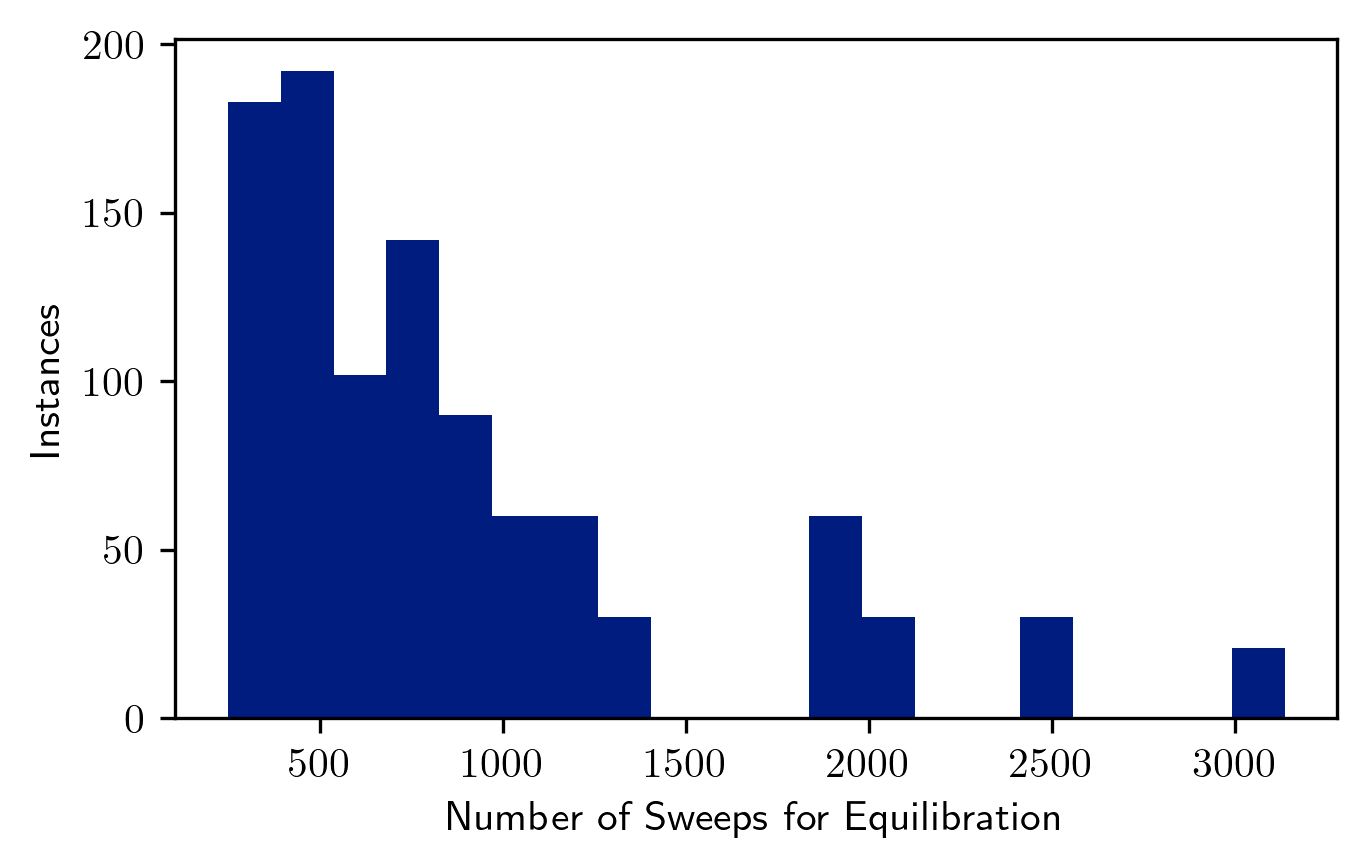

In [24]:
fig, ax = plt.subplots()
ax.hist(hist_data, bins = 20)
ax.set_xlabel('Number of Sweeps for Equilibration')
ax.set_ylabel('Instances')
fig.savefig('Equilibration_histogram.pdf')

## 2. Glider Simulation & Plotting

In [13]:
A = Game_of_Life(initial_condition='glider', plotting=False)

In [27]:
com_list = []
for i in range(200):
    com_list.append(A.com())
    A.step()
com_list = np.array(com_list)

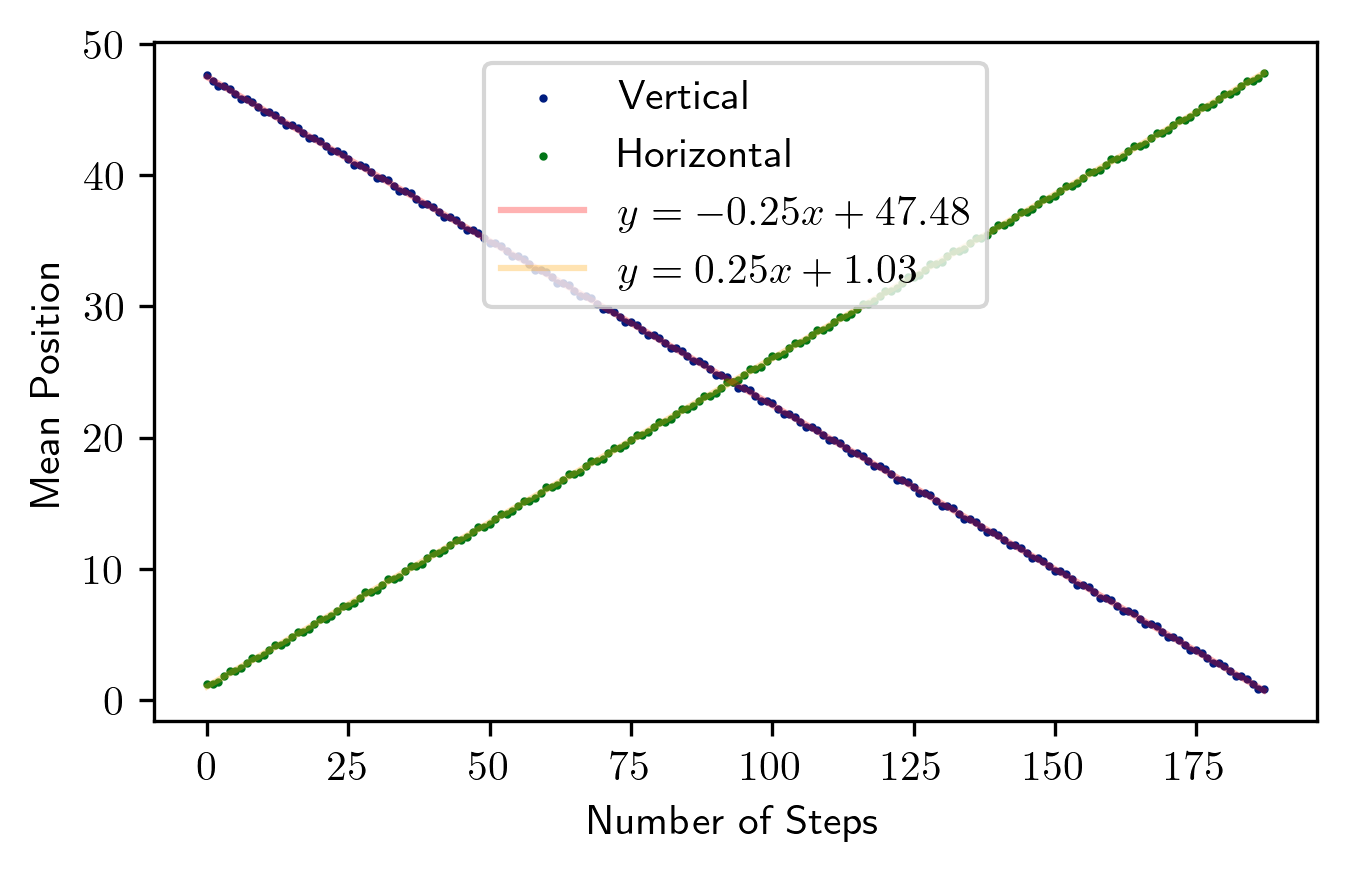

In [57]:
fig, ax = plt.subplots()

ax.scatter(np.arange(0,len(com_list[:-12,0]),1), com_list[:-12,0], s=1, label='Vertical')
ax.scatter(np.arange(0,len(com_list[:-12,1]),1), com_list[:-12,1], s=1, label='Horizontal')
fit1 = linregress(np.arange(0,len(com_list[:-12,0]),1), com_list[:-12,0])
fit2 = linregress(np.arange(0,len(com_list[:-12,1]),1), com_list[:-12,1])
ax.plot(np.arange(0,len(com_list[:-12,0]),1), fit1[0]*np.arange(0,len(com_list[:-12,0]),1) + fit1[1], c='red',alpha=0.3,label=f'$y={fit1[0]:.2f}x+{fit1[1]:.2f}$')
ax.plot(np.arange(0,len(com_list[:-12,0]),1), fit2[0]*np.arange(0,len(com_list[:-12,0]),1) + fit2[1], c='orange',alpha=0.3,label=f'$y={fit2[0]:.2f}x+{fit2[1]:.2f}$')
ax.set_xlabel('Number of Steps')
ax.set_ylabel('Mean Position')
ax.legend()
fig.savefig('glider.pdf')

## 3. SIRS Contour Plot

In [93]:
x,y,mean,var = np.loadtxt('measurements_finer.txt', delimiter=',', unpack=True)
X,Y = np.meshgrid(x,y)
Z = griddata((x,y), mean, (X,Y))

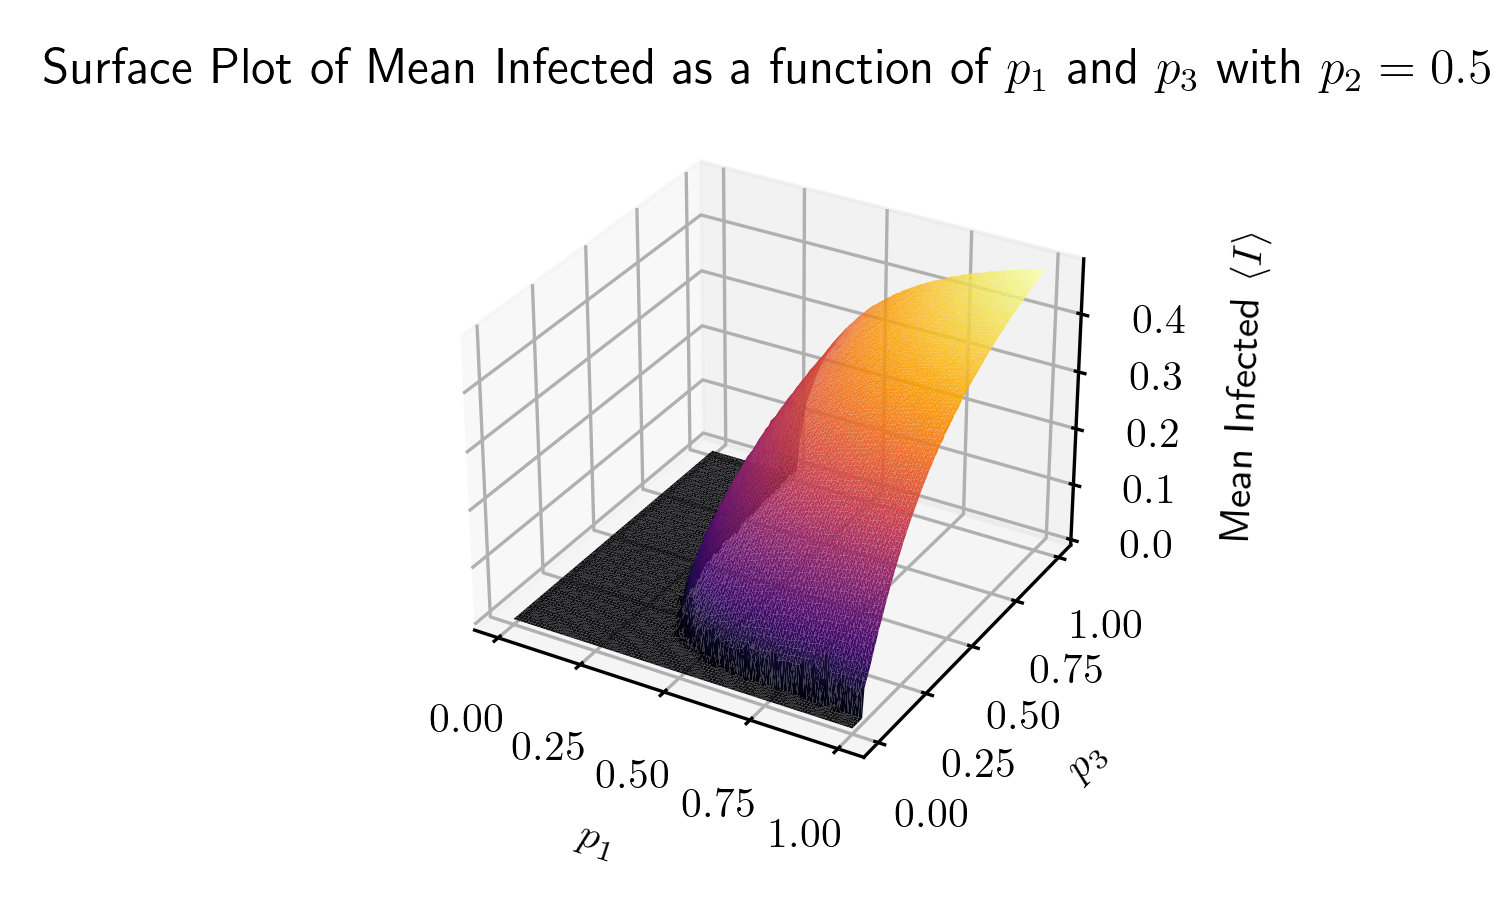

In [94]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(x,y,mean, cmap="inferno", lw=0.5,alpha=1)
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_3$')
ax.set_zlabel(r' Mean Infected $\langle I \rangle$')
ax.set_title('Surface Plot of Mean Infected as a function of $p_1$ and $p_3$ with $p_2=0.5$')
#plt.colorbar()
fig.savefig('contour.pdf')

In [14]:
p1_vals = np.linspace(0.2,0.5,100)
mean_dat, variance_dat = np.loadtxt('variance_1.txt', delimiter=',', unpack=True)
mean_dat2, variance_dat2 = np.loadtxt('variance_2.txt', delimiter=',', unpack=True)
mean_dat3, variance_dat3 = np.loadtxt('variance_3.txt', delimiter=',', unpack=True)

variance_avg = np.mean([mean_dat,mean_dat2, mean_dat3], axis=0)
variance_err = (np.std([mean_dat, mean_dat2, mean_dat3], axis = 0))**(1/2)

In [24]:
resample = []
for i in range(1000):
    resample.append(variance_dat[np.random.randint(0,100)])

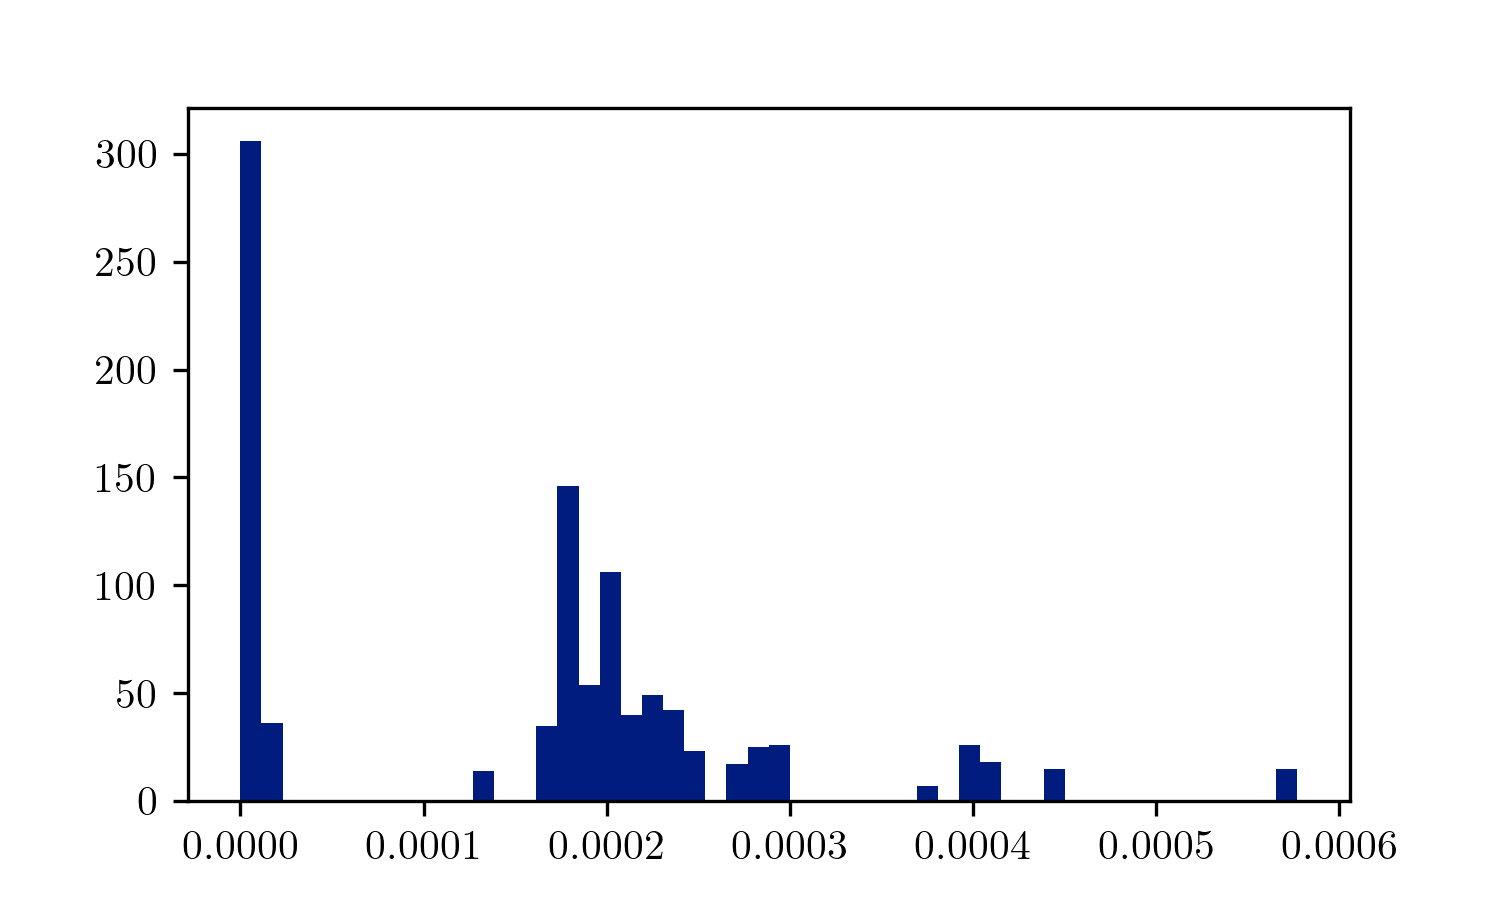

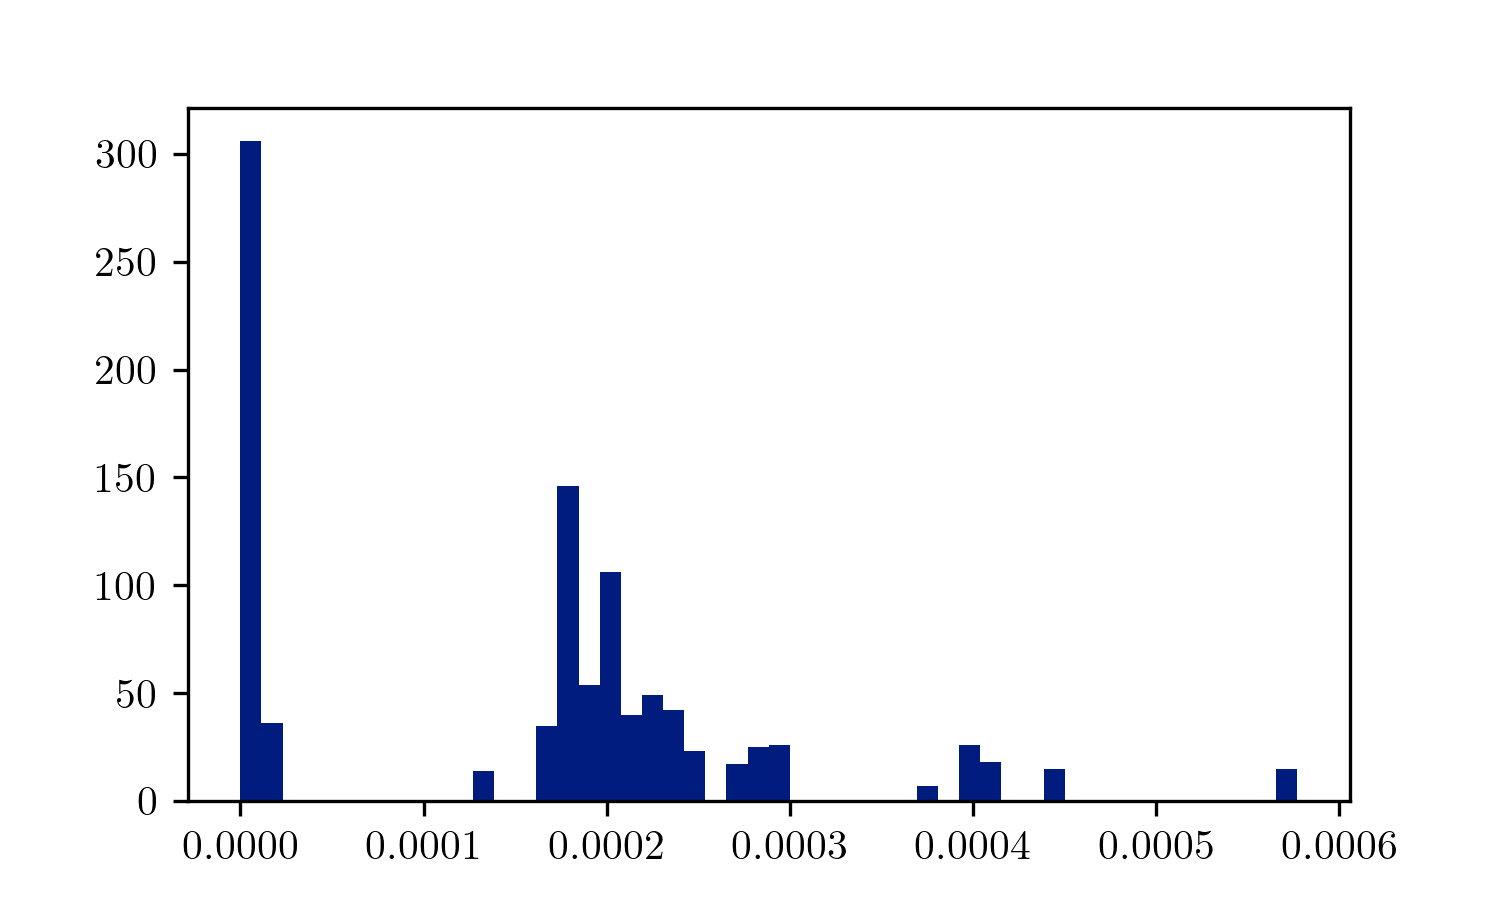

In [29]:
fig,ax = plt.subplots()
ax.hist(resample, bins=50)
fig.show()

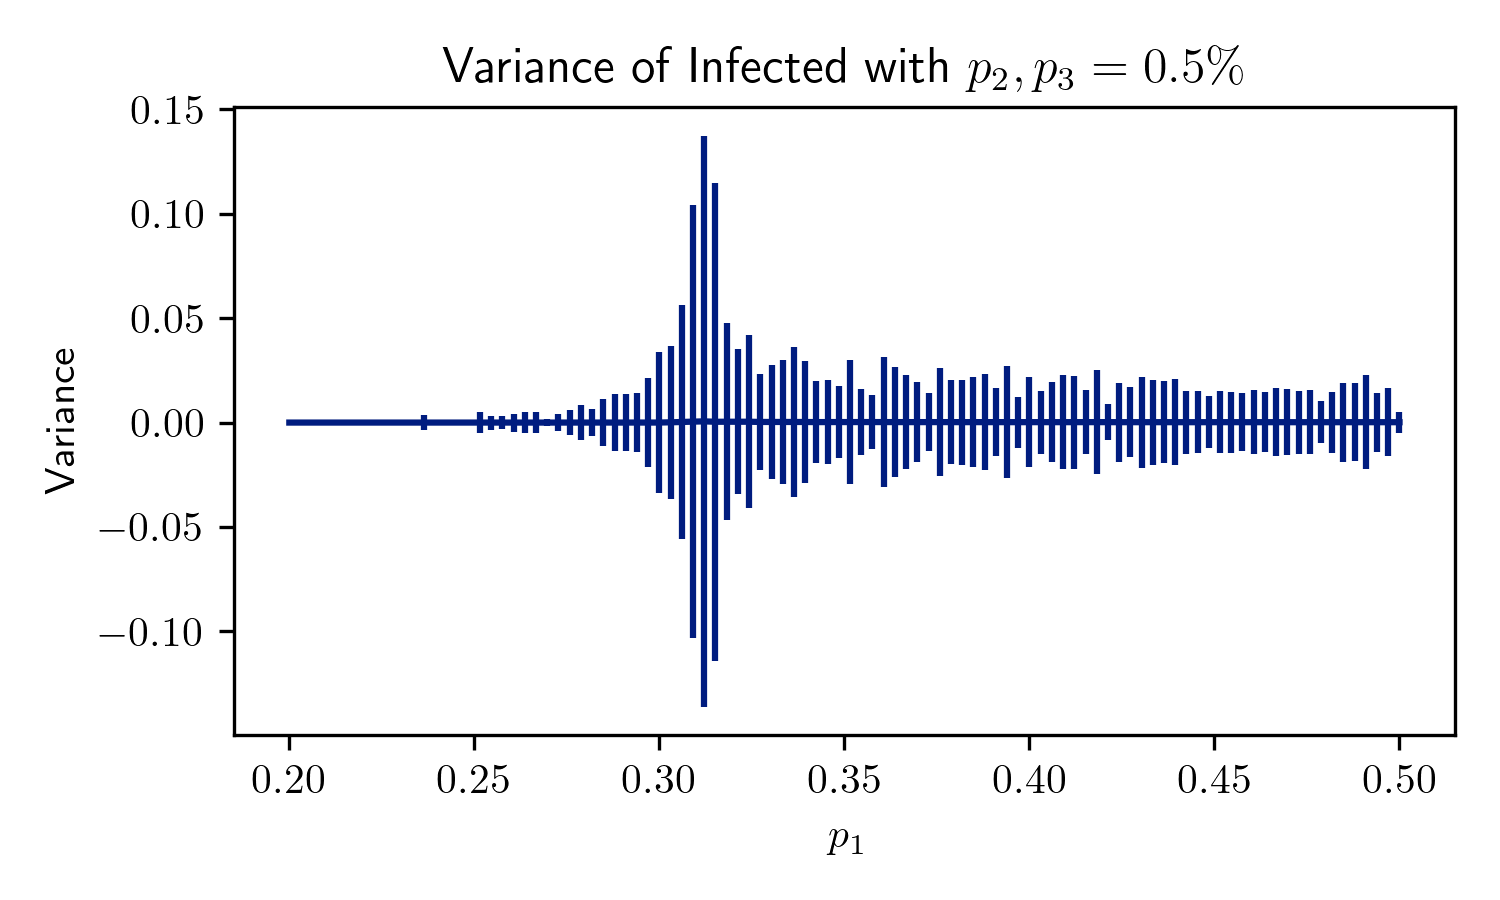

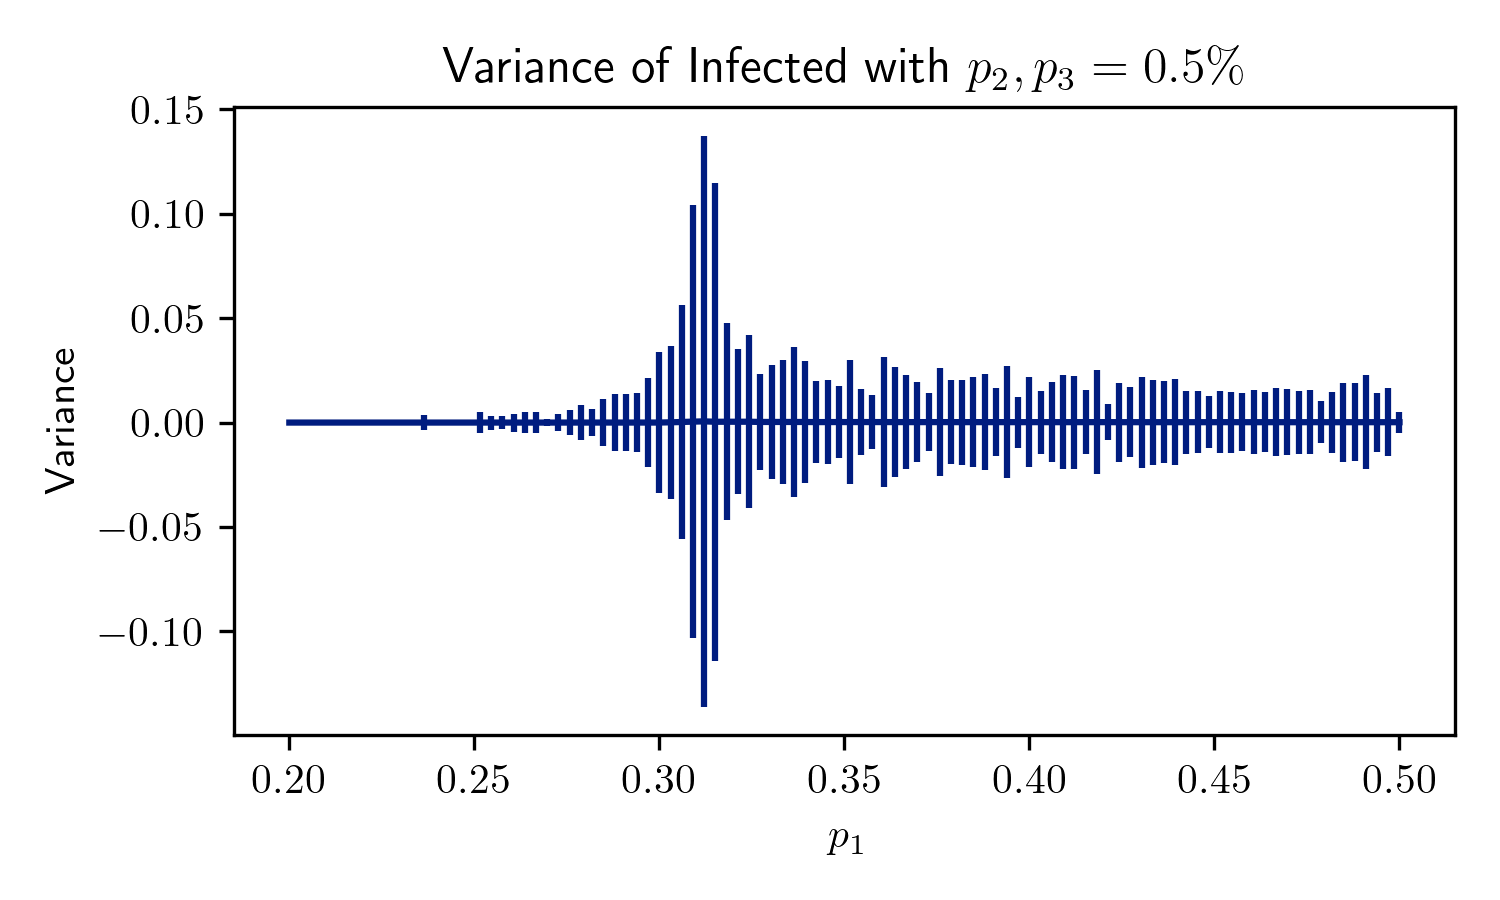

In [22]:
fig,ax = plt.subplots()
ax.errorbar(p1_vals, variance_dat, yerr=variance_err)
ax.set_xlabel('$p_1$')
ax.set_ylabel('Variance')
ax.set_title('Variance of Infected with $p_2,p_3=0.5\%$')
plt.tight_layout()
fig.savefig('variance.pdf')
fig.show()

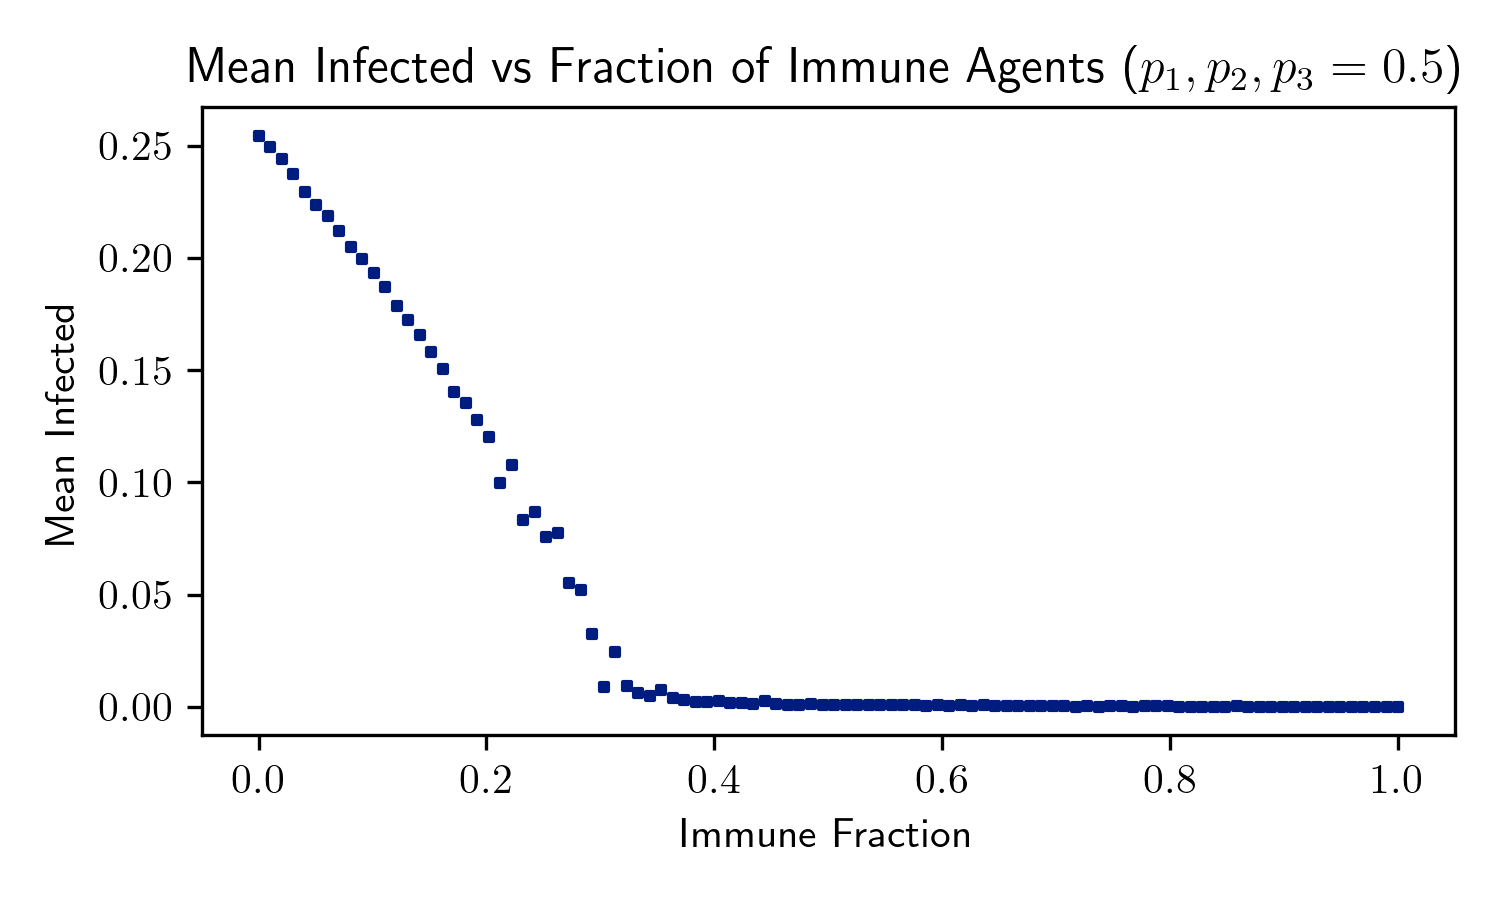

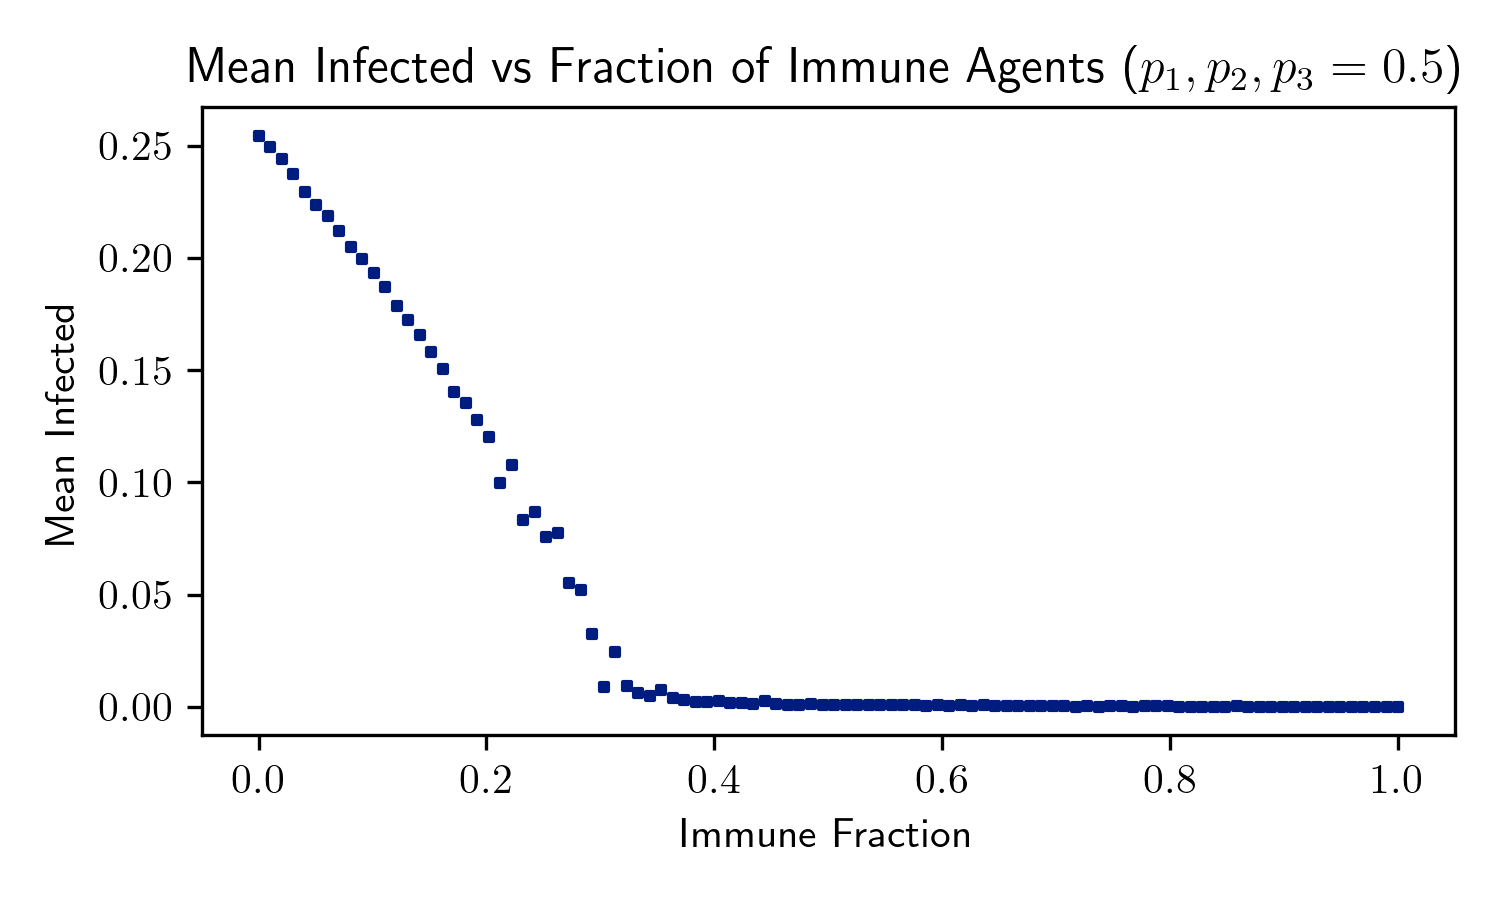

In [8]:
fig, ax = plt.subplots()
immune_dat = np.loadtxt('immune.txt',delimiter=',')
ax.scatter(np.linspace(0,1,100), immune_dat, s=3, marker='s')
ax.set_xlabel('Immune Fraction')
ax.set_ylabel('Mean Infected')
ax.set_title('Mean Infected vs Fraction of Immune Agents ($p_1, p_2, p_3 = 0.5$)')
plt.tight_layout()
fig.savefig('immune.pdf')
fig.show()


In [6]:
import os
from natsort import natsorted

In [4]:
varraw_files = os.listdir('./varraw')

In [4]:
file_names = [f"{x}_var_raw.txt" for x in np.linspace(0.2,0.5,100)]

In [8]:
p1_plot_dat = []
err_bar = []
for p1, file_name in zip(np.linspace(0.2,0.5,100), file_names):
    data = np.loadtxt(os.path.join("./varraw/", file_name), delimiter=',')
    var = (data.std(axis=0))**2
    resampled_var = []
    for j in range(5):
        resample = []
        for i in range(1000):
            resample.append(data[np.random.randint(0,high=10000)])
        resampled_var.append(np.std(resample,axis=0)**2)
    p1_plot_dat.append(var)
    err_bar.append(np.std(resampled_var, axis=0))
    

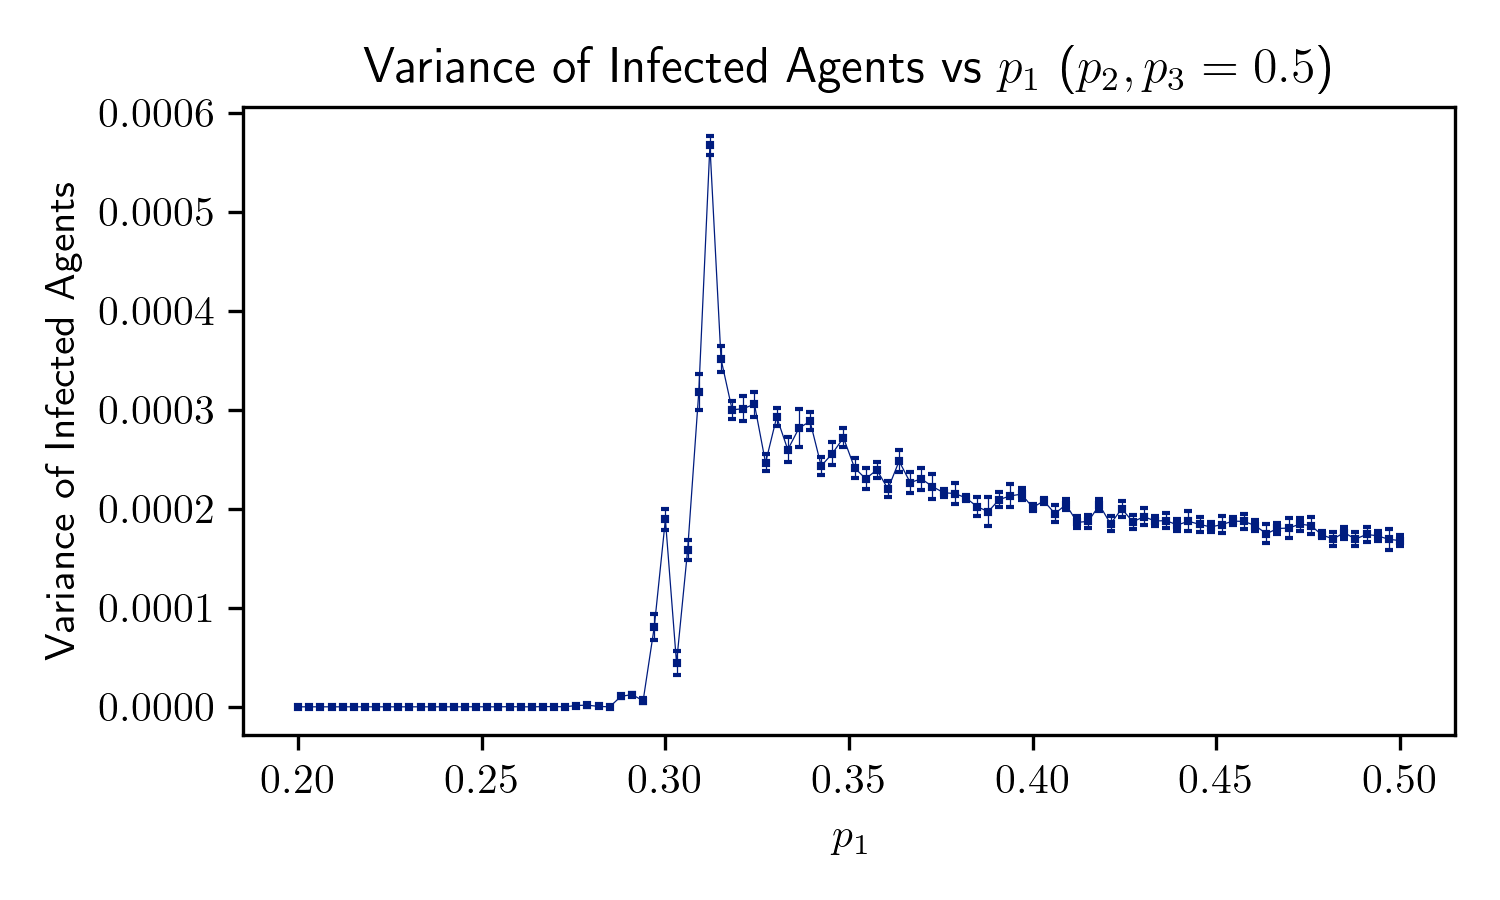

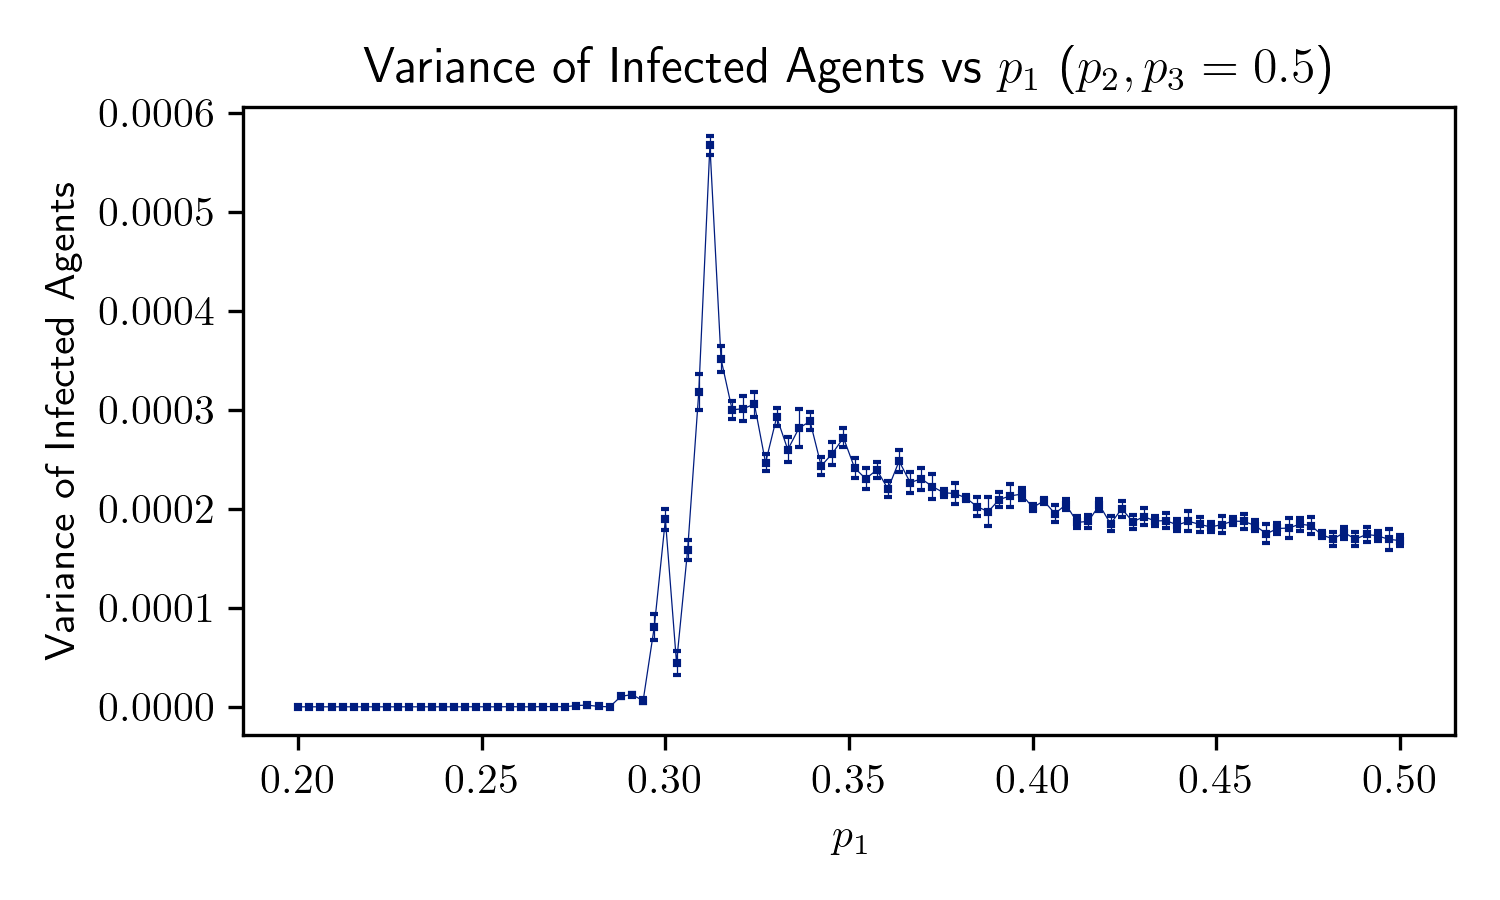

In [28]:
fig,ax = plt.subplots()
ax.errorbar(np.linspace(0.2,0.5,100), p1_plot_dat, yerr=err_bar, linewidth=0.3,capsize=1, marker='s',markersize=1)
ax.set_xlabel("$p_1$")
ax.set_ylabel("Variance of Infected Agents")
ax.set_title("Variance of Infected Agents vs $p_1$ ($p_2, p_3 = 0.5$)")
plt.tight_layout()
fig.savefig("variance.pdf")
fig.show()